Edgar Skåland Røste, 17/10-19
# Machine Learning
## *Classification of fashion images using Convolutional Neural Network (CNN)*

## Introduction
For this assignment I am tasked with designing a Convolutional Neural Network to learn the MNIST clothing dataset. The model will be able to take unseen images as input and predict what the image is showing. To do this I have to first explore the dataset to understand what my model needs to accept as input. After this I will evaluate different methods of constructing the Neural Net, to achieve higher accuracy. Simultaneously I will draw various plots and graphs to illustrate my results, as well as interpreting them.

## Task 1
## *Import dataset & Creating CNN*

### Import modules

In [1]:
# Various tools needed for Tensorflow and Keras
from __future__ import absolute_import, division, print_function, unicode_literals

# Numpy contains various convenient functions for doing mathematical operations
import numpy as np

# Pandas is easy to use for importing datasets
import pandas as pd

# Matplotlib is used to draw plots
import matplotlib.pyplot as plt

# Tabulate lets me create nice looking text output
from tabulate import tabulate

# Tensorflow and Keras is needed for implementing the Machine Learning algorithms
import tensorflow as tf
import keras
from keras import datasets, layers, models

Using TensorFlow backend.


### Import dataset
The dataset is already split into two separate files. I load both of them into separate objects and then split these again into training and testing data.
1. fashion-mnist_train.csv (60.000 rows)
2. fashion-mnist_test.csv (10.000 rows)

In [2]:
# The dataset is in csv format, and can be easily loaded with pandas
df_train = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
df_test = pd.read_csv('fashionmnist/fashion-mnist_test.csv')

# Separate the training data into images and labels
# The images are represented by all the columns except for the label column, so drop that
train_X = df_train.drop("label", axis=1)
# Store the label data on its own
train_y = df_train["label"]

# Repeat for testing data
test_X = df_test.drop("label", axis=1)
test_y = df_test["label"]

# Look at the image data
train_X.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       5       0   
3       0       0       0       1       2       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0        30        43         0   
3        0  ...         3         0         0         0         0         1   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

#### Looking at the dimensions of the data
To get a sense of what the data structures look like after splitting them up, I tabulate it. This tells me what I need to do in order to make it usable.

In [3]:
# The tabulate module is very convenient for making small representations
tabulated = tabulate([
    ["Data", "Shape", "Type"],
    ["train_X", train_X.shape, type(train_X)],
    ["train_y", train_y.shape, type(train_y)],
    ["test_X", test_X.shape, type(test_X)],
    ["test_y", test_y.shape, type(test_y)],
], headers="firstrow")
print(tabulated)

Data     Shape         Type
-------  ------------  -------------------------------------
train_X  (60000, 784)  <class 'pandas.core.frame.DataFrame'>
train_y  (60000,)      <class 'pandas.core.series.Series'>
test_X   (10000, 784)  <class 'pandas.core.frame.DataFrame'>
test_y   (10000,)      <class 'pandas.core.series.Series'>


#### Reshaping it to have proper dimensions
I now reshape it so that it is ready to be used both for visualization and for inserting into the CNN later on.

In [4]:
# I reshape the image data from a single row of values to the 28x28 image that it is supposed to be,
# I also add the fourth dimension as it is needed for the model
train_X = np.array(train_X).reshape((train_X.shape[0], 28, 28, 1))
test_X = np.array(test_X).reshape((test_X.shape[0], 28, 28, 1))

# The label data is a series, so I shape it into an array instead 
train_y = np.array(train_y).reshape((train_y.shape[0], 1))
test_y = np.array(test_y).reshape((test_y.shape[0], 1))

tabulated = tabulate([
    ["Data","Shape", "Type"],
    ["train_X", train_X.shape, type(train_X)],
    ["train_y", train_y.shape, type(train_y)],
    ["test_X", test_X.shape, type(test_X)],
    ["test_y", test_y.shape, type(test_y)],
], headers="firstrow")
print(tabulated)

Data     Shape               type
-------  ------------------  -----------------------
train_X  (60000, 28, 28, 1)  <class 'numpy.ndarray'>
train_y  (60000, 1)          <class 'numpy.ndarray'>
test_X   (10000, 28, 28, 1)  <class 'numpy.ndarray'>
test_y   (10000, 1)          <class 'numpy.ndarray'>


### Visualizing the dataset
Before I start doing anything related to Machine Learning I want to know what the data looks like. I start by first implementing the labels' integer value and their corresponding text value.
Then I find one example of each label and draw them with matplotlib.

#### Placing the labels into text
The labels are stored as integers in the dataset. On the dataset's Kaggle page there is a "translation". I create a dictionary of these so that I can visualize and test.

In [5]:
labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

#### Finding one example of each label
I iterate the training data from the first index and store the first entry of each label. I use these to visualize.

In [6]:
# A list of the labels already collected
labels_used = list()

# Used to store the images that will be displayed. Key is the label
image_showcase = dict()

# Iterate dataset to find unique labels
for index, row in df_train.iterrows():
    
    # Collect the label from the training data entry
    label = train_y[index][0]
    
    # If label is already used, skip to the next row
    if label in labels_used:
        continue
    
    # Store the label so that it is not used again
    labels_used.append(label)
    
    # Store the image to be used, this guarantees that the key (label) and image match
    image_showcase[label] = train_X[index]
    
    # Print results
    print("{} found at row {}".format(labels[label], index))
    
    # If 10 labels have been found, search is complete
    if len(labels_used) == 10:
        break

Pullover found at row 0
Ankle boot found at row 1
Shirt found at row 2
T-shirt/top found at row 3
Dress found at row 4
Coat found at row 5
Sandal found at row 7
Bag found at row 9
Sneaker found at row 21
Trouser found at row 29


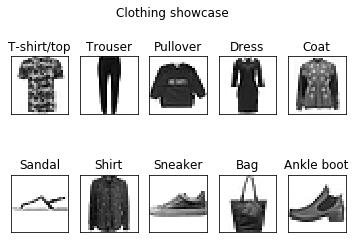

In [7]:
# Create subplot to display the 10 different types of images
rows = 2
columns = 5
fig, axis = plt.subplots(rows, columns)

# Start with the first label
label = 0

# Go through the rows and columns of the plot, and draw one label on each
for row in range(rows):
    for col in range(columns):

        # Use the label to retrieve the pixel data stored earlier
        image = image_showcase[label]
        
        # It is neccesary to reshape to remove the third dimension
        image = image.reshape((28, 28))
        
        # Get the current axis
        ax = axis[row][col]
        
        # Draw the image with reverse grayscale, looks better for humans
        ax.imshow(image, cmap=plt.get_cmap("gray_r"))
        
        # Write the title for each plot
        ax.set_title(labels[label])
        
        # Hide the x and y axes, they are not relevant for showing images
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # Increase the label to the next clothing type
        label += 1

# Set the title for the plot and display it
plt.suptitle("Clothing showcase")
plt.show()

## Creating The Convolutional Neural Network
### Model design
Now I create the Neural Network Model that is going to learn the image data. The model consists of two convolutional layers, a third large dense layer and ends with a dense layer with 10 nodes, corresponding to the number of labels in the dataset. 

In [8]:
# Start with a sequential model. This model takes input from the left and outputs it on the right.
model = models.Sequential()

# I start with a convolutional layer to extract the features of the image
model.add(layers.Conv2D(30, (3, 3), activation='sigmoid', padding="same", input_shape=(28, 28, 1)))
# I normalise the layer's output, to bring the values into Sigmoid Derivative's steepest incline (See graph below)
# This makes small changes to the weights have a greater effect, as the sigmoid derivative is steeper
# in the -1 to 1 range. Sigmoid suffers from the vanishing gradient problem, because the far edges of the derivative
# has little to no incline, normalisation fixes this.
model.add(layers.BatchNormalization())
# I max pool to reduce the dimension of the data, this will speed up processing, while retaining
# much of the information
model.add(layers.MaxPooling2D((2, 2)))
# To prevent overfitting I add a dropout layer.
# Droput removes some nodes randomly during the training, this prevents overfitting because the network is forced
# to learn more robust features of the data. Dropout only applies during training,
# for validation all nodes are evaluated.
model.add(layers.Dropout(0.5))

# This is identical in structure to the previous layer, 
# I choose more filters on the layers, now that the data has been reduced
model.add(layers.Conv2D(50, (3, 3), activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

# Before entering the dense layers, it needs to be flattened
model.add(layers.Flatten())
# To extract as much as possible I use a big dense layer at the end
# I can afford it computationally because the data has max pooled twice now
model.add(layers.Dense(512, activation='relu'))
# A last dropout before the output
model.add(layers.Dropout(0.5))
# The output layer only has 10 nodes, corresponding to the amount of labels
model.add(layers.Dense(10, activation='softmax'))

# Print a summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 30)        300       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 30)        120       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 50)        13550     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 50)        200       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 50)         

#### Illustration of normalisation
This graph shows that the incline for Sigmoid derivative is much greater at the -1 to 1 range, than outside.

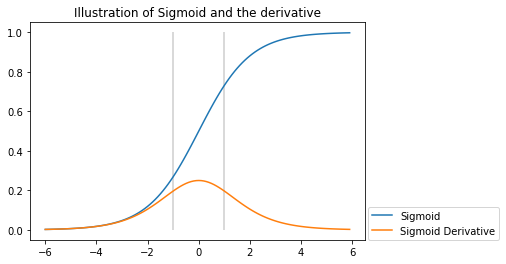

In [70]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

x_values = np.arange(-6, 6, 0.1)

plt.plot(x_values, sigmoid(x_values), label="Sigmoid")
plt.plot(x_values, sigmoid_derivative(x_values), label="Sigmoid Derivative")
plt.vlines(1, 0, 1, alpha=0.2)
plt.vlines(-1, 0, 1, alpha=0.2)

plt.legend(loc=(1.01, 0))
plt.title("Illustration of Sigmoid and the derivative")
plt.show()

### Training

In [9]:
# The number of epochs to run
epochs = 1_000

# Compile the model created above, with the adam optimizer.
# There are many different optimizer algorithms, but adam works the best in most situations
# Since an image can only have one label, I use sparse categorical crossentropy to calculate loss,
# I also want to measure the accuracy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start the training and store the results troughout
history = model.fit(train_X, train_y, epochs=epochs, validation_data=(test_X, test_y))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 49s 818us/step - loss: 0.6353 - accuracy: 0.7672 - val_loss: 0.4363 - val_accuracy: 0.8515
Epoch 2/1000
60000/60000 [==============================] - 48s 807us/step - loss: 0.4685 - accuracy: 0.8263 - val_loss: 0.3845 - val_accuracy: 0.8701
Epoch 3/1000
60000/60000 [==============================] - 49s 809us/step - loss: 0.4350 - accuracy: 0.8396 - val_loss: 0.3918 - val_accuracy: 0.8738
Epoch 4/1000
60000/60000 [==============================] - 49s 816us/step - loss: 0.4180 - accuracy: 0.8458 - val_loss: 0.3620 - val_accuracy: 0.8813
Epoch 5/1000
60000/60000 [==============================] - 49s 816us/step - loss: 0.3973 - accuracy: 0.8533 - val_loss: 0.3536 - val_accuracy: 0.8891
Epoch 6/1000
60000/60000 [==============================] - 49s 820us/step - loss: 0.3865 - accuracy: 0.8577 - val_loss: 0.3091 - val_accuracy: 0.8925
Epoch 7/1000
60000/60000 [==================

60000/60000 [==============================] - 50s 841us/step - loss: 0.2492 - accuracy: 0.9072 - val_loss: 0.2182 - val_accuracy: 0.9241
Epoch 55/1000
60000/60000 [==============================] - 51s 843us/step - loss: 0.2432 - accuracy: 0.9093 - val_loss: 0.2115 - val_accuracy: 0.9239
Epoch 56/1000
60000/60000 [==============================] - 50s 840us/step - loss: 0.2478 - accuracy: 0.9070 - val_loss: 0.2143 - val_accuracy: 0.9234
Epoch 57/1000
60000/60000 [==============================] - 50s 841us/step - loss: 0.2438 - accuracy: 0.9081 - val_loss: 0.2122 - val_accuracy: 0.9274
Epoch 58/1000
60000/60000 [==============================] - 50s 841us/step - loss: 0.2437 - accuracy: 0.9085 - val_loss: 0.2172 - val_accuracy: 0.9241
Epoch 59/1000
60000/60000 [==============================] - 50s 840us/step - loss: 0.2426 - accuracy: 0.9097 - val_loss: 0.2051 - val_accuracy: 0.9251
Epoch 60/1000
60000/60000 [==============================] - 50s 839us/step - loss: 0.2373 - accuracy:

Epoch 108/1000
60000/60000 [==============================] - 50s 833us/step - loss: 0.2188 - accuracy: 0.9196 - val_loss: 0.2155 - val_accuracy: 0.9272
Epoch 109/1000
60000/60000 [==============================] - 50s 834us/step - loss: 0.2185 - accuracy: 0.9176 - val_loss: 0.1987 - val_accuracy: 0.9291
Epoch 110/1000
60000/60000 [==============================] - 50s 833us/step - loss: 0.2187 - accuracy: 0.9181 - val_loss: 0.2096 - val_accuracy: 0.9303
Epoch 111/1000
60000/60000 [==============================] - 50s 833us/step - loss: 0.2170 - accuracy: 0.9201 - val_loss: 0.2135 - val_accuracy: 0.9299
Epoch 112/1000
60000/60000 [==============================] - 50s 833us/step - loss: 0.2136 - accuracy: 0.9201 - val_loss: 0.2256 - val_accuracy: 0.9279
Epoch 113/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.2177 - accuracy: 0.9191 - val_loss: 0.2070 - val_accuracy: 0.9293
Epoch 114/1000
60000/60000 [==============================] - 50s 833us/step - los

60000/60000 [==============================] - 50s 830us/step - loss: 0.2033 - accuracy: 0.9251 - val_loss: 0.2099 - val_accuracy: 0.9324
Epoch 162/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.2033 - accuracy: 0.9250 - val_loss: 0.2190 - val_accuracy: 0.9332
Epoch 163/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.2010 - accuracy: 0.9267 - val_loss: 0.2066 - val_accuracy: 0.9342
Epoch 164/1000
60000/60000 [==============================] - 50s 834us/step - loss: 0.2024 - accuracy: 0.9238 - val_loss: 0.2155 - val_accuracy: 0.9307
Epoch 165/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.2034 - accuracy: 0.9245 - val_loss: 0.2082 - val_accuracy: 0.9346
Epoch 166/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1985 - accuracy: 0.9262 - val_loss: 0.2145 - val_accuracy: 0.9311
Epoch 167/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.2012 - acc

60000/60000 [==============================] - 50s 830us/step - loss: 0.1956 - accuracy: 0.9271 - val_loss: 0.2136 - val_accuracy: 0.9340
Epoch 215/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1954 - accuracy: 0.9278 - val_loss: 0.2143 - val_accuracy: 0.9330
Epoch 216/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1995 - accuracy: 0.9262 - val_loss: 0.1952 - val_accuracy: 0.9343
Epoch 217/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1956 - accuracy: 0.9272 - val_loss: 0.2216 - val_accuracy: 0.9337
Epoch 218/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1958 - accuracy: 0.9283 - val_loss: 0.2207 - val_accuracy: 0.9315
Epoch 219/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1954 - accuracy: 0.9287 - val_loss: 0.2218 - val_accuracy: 0.9320
Epoch 220/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1951 - acc

60000/60000 [==============================] - 50s 835us/step - loss: 0.1895 - accuracy: 0.9297 - val_loss: 0.2052 - val_accuracy: 0.9364
Epoch 268/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1881 - accuracy: 0.9303 - val_loss: 0.1991 - val_accuracy: 0.9350
Epoch 269/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1878 - accuracy: 0.9313 - val_loss: 0.2301 - val_accuracy: 0.9355
Epoch 270/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1862 - accuracy: 0.9316 - val_loss: 0.2015 - val_accuracy: 0.9348
Epoch 271/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1910 - accuracy: 0.9287 - val_loss: 0.2151 - val_accuracy: 0.9346
Epoch 272/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1930 - accuracy: 0.9283 - val_loss: 0.2353 - val_accuracy: 0.9337
Epoch 273/1000
60000/60000 [==============================] - 50s 833us/step - loss: 0.1894 - acc

60000/60000 [==============================] - 50s 831us/step - loss: 0.1880 - accuracy: 0.9317 - val_loss: 0.2148 - val_accuracy: 0.9314
Epoch 321/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1867 - accuracy: 0.9316 - val_loss: 0.2281 - val_accuracy: 0.9332
Epoch 322/1000
60000/60000 [==============================] - 50s 833us/step - loss: 0.1897 - accuracy: 0.9308 - val_loss: 0.2072 - val_accuracy: 0.9351
Epoch 323/1000
60000/60000 [==============================] - 50s 833us/step - loss: 0.1962 - accuracy: 0.9273 - val_loss: 0.2198 - val_accuracy: 0.9339
Epoch 324/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1878 - accuracy: 0.9312 - val_loss: 0.2185 - val_accuracy: 0.9346
Epoch 325/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1859 - accuracy: 0.9312 - val_loss: 0.2150 - val_accuracy: 0.9346
Epoch 326/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1822 - acc

60000/60000 [==============================] - 50s 830us/step - loss: 0.1808 - accuracy: 0.9338 - val_loss: 0.2149 - val_accuracy: 0.9350
Epoch 374/1000
60000/60000 [==============================] - 50s 829us/step - loss: 0.1843 - accuracy: 0.9330 - val_loss: 0.2004 - val_accuracy: 0.9369
Epoch 375/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1853 - accuracy: 0.9328 - val_loss: 0.1977 - val_accuracy: 0.9381
Epoch 376/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1838 - accuracy: 0.9328 - val_loss: 0.2361 - val_accuracy: 0.9351
Epoch 377/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1849 - accuracy: 0.9318 - val_loss: 0.2089 - val_accuracy: 0.9352
Epoch 378/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1866 - accuracy: 0.9325 - val_loss: 0.2104 - val_accuracy: 0.9364
Epoch 379/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1818 - acc

60000/60000 [==============================] - 50s 830us/step - loss: 0.1789 - accuracy: 0.9339 - val_loss: 0.2451 - val_accuracy: 0.9322
Epoch 427/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1812 - accuracy: 0.9329 - val_loss: 0.2051 - val_accuracy: 0.9325
Epoch 428/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1829 - accuracy: 0.9327 - val_loss: 0.2233 - val_accuracy: 0.9335
Epoch 429/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1804 - accuracy: 0.9334 - val_loss: 0.2053 - val_accuracy: 0.9364
Epoch 430/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1841 - accuracy: 0.9322 - val_loss: 0.2201 - val_accuracy: 0.9344
Epoch 431/1000
60000/60000 [==============================] - 50s 834us/step - loss: 0.1839 - accuracy: 0.9349 - val_loss: 0.2403 - val_accuracy: 0.9331
Epoch 432/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1857 - acc

60000/60000 [==============================] - 53s 879us/step - loss: 0.1793 - accuracy: 0.9354 - val_loss: 0.2353 - val_accuracy: 0.9356
Epoch 480/1000
60000/60000 [==============================] - 50s 838us/step - loss: 0.1783 - accuracy: 0.9359 - val_loss: 0.2261 - val_accuracy: 0.9357
Epoch 481/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1782 - accuracy: 0.9350 - val_loss: 0.2207 - val_accuracy: 0.9325
Epoch 482/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1791 - accuracy: 0.9353 - val_loss: 0.2345 - val_accuracy: 0.9342
Epoch 483/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1796 - accuracy: 0.9347 - val_loss: 0.2034 - val_accuracy: 0.9339
Epoch 484/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1833 - accuracy: 0.9335 - val_loss: 0.2173 - val_accuracy: 0.9351
Epoch 485/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1794 - acc

60000/60000 [==============================] - 50s 831us/step - loss: 0.1808 - accuracy: 0.9341 - val_loss: 0.2305 - val_accuracy: 0.9330
Epoch 533/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1772 - accuracy: 0.9358 - val_loss: 0.2077 - val_accuracy: 0.9346
Epoch 534/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1778 - accuracy: 0.9365 - val_loss: 0.2231 - val_accuracy: 0.9359
Epoch 535/1000
60000/60000 [==============================] - 50s 835us/step - loss: 0.1745 - accuracy: 0.9372 - val_loss: 0.2397 - val_accuracy: 0.9377
Epoch 536/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1764 - accuracy: 0.9354 - val_loss: 0.2251 - val_accuracy: 0.9348
Epoch 537/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1749 - accuracy: 0.9377 - val_loss: 0.2157 - val_accuracy: 0.9361
Epoch 538/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1794 - acc

60000/60000 [==============================] - 50s 831us/step - loss: 0.1823 - accuracy: 0.9353 - val_loss: 0.2439 - val_accuracy: 0.9336
Epoch 586/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1788 - accuracy: 0.9352 - val_loss: 0.2330 - val_accuracy: 0.9332
Epoch 587/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1789 - accuracy: 0.9360 - val_loss: 0.2105 - val_accuracy: 0.9366
Epoch 588/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1772 - accuracy: 0.9357 - val_loss: 0.2213 - val_accuracy: 0.9388
Epoch 589/1000
60000/60000 [==============================] - 50s 833us/step - loss: 0.1859 - accuracy: 0.9324 - val_loss: 0.2110 - val_accuracy: 0.9335
Epoch 590/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1836 - accuracy: 0.9329 - val_loss: 0.2248 - val_accuracy: 0.9348
Epoch 591/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1748 - acc

60000/60000 [==============================] - 50s 832us/step - loss: 0.1780 - accuracy: 0.9361 - val_loss: 0.2278 - val_accuracy: 0.9330
Epoch 639/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1765 - accuracy: 0.9365 - val_loss: 0.2343 - val_accuracy: 0.9364
Epoch 640/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1758 - accuracy: 0.9377 - val_loss: 0.2052 - val_accuracy: 0.9355
Epoch 641/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1755 - accuracy: 0.9375 - val_loss: 0.2457 - val_accuracy: 0.9355
Epoch 642/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1806 - accuracy: 0.9343 - val_loss: 0.2151 - val_accuracy: 0.9364
Epoch 643/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1748 - accuracy: 0.9374 - val_loss: 0.2150 - val_accuracy: 0.9347
Epoch 644/1000
60000/60000 [==============================] - 50s 833us/step - loss: 0.1804 - acc

60000/60000 [==============================] - 50s 831us/step - loss: 0.1744 - accuracy: 0.9375 - val_loss: 0.2806 - val_accuracy: 0.9389
Epoch 692/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1802 - accuracy: 0.9360 - val_loss: 0.2416 - val_accuracy: 0.9372
Epoch 693/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1773 - accuracy: 0.9352 - val_loss: 0.2598 - val_accuracy: 0.9374
Epoch 694/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1783 - accuracy: 0.9357 - val_loss: 0.2732 - val_accuracy: 0.9343
Epoch 695/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1775 - accuracy: 0.9370 - val_loss: 0.2444 - val_accuracy: 0.9346
Epoch 696/1000
60000/60000 [==============================] - 50s 829us/step - loss: 0.1724 - accuracy: 0.9390 - val_loss: 0.2231 - val_accuracy: 0.9352
Epoch 697/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1783 - acc

60000/60000 [==============================] - 50s 839us/step - loss: 0.1784 - accuracy: 0.9353 - val_loss: 0.2822 - val_accuracy: 0.9367
Epoch 745/1000
60000/60000 [==============================] - 51s 853us/step - loss: 0.1773 - accuracy: 0.9354 - val_loss: 0.2641 - val_accuracy: 0.9316
Epoch 746/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1775 - accuracy: 0.9356 - val_loss: 0.2229 - val_accuracy: 0.9354
Epoch 747/1000
60000/60000 [==============================] - 50s 834us/step - loss: 0.1758 - accuracy: 0.9374 - val_loss: 0.2378 - val_accuracy: 0.9383
Epoch 748/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1707 - accuracy: 0.9377 - val_loss: 0.2326 - val_accuracy: 0.9360
Epoch 749/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1779 - accuracy: 0.9364 - val_loss: 0.2437 - val_accuracy: 0.9336
Epoch 750/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1752 - acc

60000/60000 [==============================] - 50s 829us/step - loss: 0.1792 - accuracy: 0.9362 - val_loss: 0.2311 - val_accuracy: 0.9364
Epoch 798/1000
60000/60000 [==============================] - 50s 829us/step - loss: 0.1752 - accuracy: 0.9373 - val_loss: 0.2187 - val_accuracy: 0.9346
Epoch 799/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1746 - accuracy: 0.9377 - val_loss: 0.2597 - val_accuracy: 0.9331
Epoch 800/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1805 - accuracy: 0.9361 - val_loss: 0.2265 - val_accuracy: 0.9341
Epoch 801/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1806 - accuracy: 0.9355 - val_loss: 0.2195 - val_accuracy: 0.9347
Epoch 802/1000
60000/60000 [==============================] - 50s 833us/step - loss: 0.1792 - accuracy: 0.9355 - val_loss: 0.2357 - val_accuracy: 0.9367
Epoch 803/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1722 - acc

60000/60000 [==============================] - 50s 831us/step - loss: 0.1792 - accuracy: 0.9356 - val_loss: 0.2279 - val_accuracy: 0.9337
Epoch 851/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1773 - accuracy: 0.9385 - val_loss: 0.2773 - val_accuracy: 0.9341
Epoch 852/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1756 - accuracy: 0.9384 - val_loss: 0.2592 - val_accuracy: 0.9368
Epoch 853/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1761 - accuracy: 0.9373 - val_loss: 0.2690 - val_accuracy: 0.9355
Epoch 854/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1713 - accuracy: 0.9384 - val_loss: 0.2590 - val_accuracy: 0.9349
Epoch 855/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1834 - accuracy: 0.9341 - val_loss: 0.2053 - val_accuracy: 0.9335
Epoch 856/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1831 - acc

60000/60000 [==============================] - 50s 831us/step - loss: 0.1780 - accuracy: 0.9366 - val_loss: 0.2775 - val_accuracy: 0.9340
Epoch 904/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1813 - accuracy: 0.9352 - val_loss: 0.2210 - val_accuracy: 0.9334
Epoch 905/1000
60000/60000 [==============================] - 50s 833us/step - loss: 0.1762 - accuracy: 0.9370 - val_loss: 0.2853 - val_accuracy: 0.9336
Epoch 906/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1769 - accuracy: 0.9361 - val_loss: 0.2556 - val_accuracy: 0.9336
Epoch 907/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1808 - accuracy: 0.9361 - val_loss: 0.2565 - val_accuracy: 0.9344
Epoch 908/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1714 - accuracy: 0.9386 - val_loss: 0.2453 - val_accuracy: 0.9356
Epoch 909/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1747 - acc

60000/60000 [==============================] - 50s 831us/step - loss: 0.1738 - accuracy: 0.9371 - val_loss: 0.2713 - val_accuracy: 0.9345
Epoch 957/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1858 - accuracy: 0.9343 - val_loss: 0.2648 - val_accuracy: 0.9329
Epoch 958/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1692 - accuracy: 0.9381 - val_loss: 0.2614 - val_accuracy: 0.9358
Epoch 959/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1742 - accuracy: 0.9385 - val_loss: 0.2167 - val_accuracy: 0.9343
Epoch 960/1000
60000/60000 [==============================] - 50s 832us/step - loss: 0.1850 - accuracy: 0.9344 - val_loss: 0.2502 - val_accuracy: 0.9375
Epoch 961/1000
60000/60000 [==============================] - 50s 830us/step - loss: 0.1756 - accuracy: 0.9370 - val_loss: 0.2971 - val_accuracy: 0.9369
Epoch 962/1000
60000/60000 [==============================] - 50s 831us/step - loss: 0.1795 - acc

## Task 2
## *Testing*
### Looking at performance
The history object records both the accuracy and loss of the model for each epoch. Since this is a classification problem, the accuracy is more interesting than the loss. 

#### Plotting the accuracy over time
To see how the model performed over time, I plot the accuracy of the training data together with the validation (testing) data.
I see that the improvement goes up quickly, especially for the validation data. This is because of the dropout. Since the dropout is not applied during testing, there are more nodes that reinforce an opinion about what the image is showing, during testing many of these are dropped, making the network make mistakes more often. Over time the nodes get more and more robust, so the training accuracy catches up to the validation accuracy.
However, it quickly converges, and the improvements are no longer very discernable on a large plot.

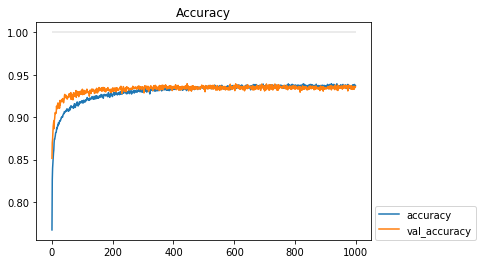

Final accuracy: 0.9355999827384949


In [111]:
# Plot the accuracy of the training together with the validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

# Place the legend in the lower right corner
plt.legend(loc=(1.01, 0))

# Draw a thin grey line indicating the maximum possible accuracy (1)
plt.hlines(1, -1, epochs+1, linestyle="solid", alpha=0.1)

# Set the title of the plot and show it
plt.title("Accuracy")
plt.show()

# Evaluate the model to get the final accuracy and loss 
final_loss, final_acc = model.evaluate(test_X,  test_y, verbose=2)
print("Final accuracy:", final_acc)

##### Taking a closer look
By zooming in on the accuracy graph, it becomes easier to see what happens to the graph when it converges.

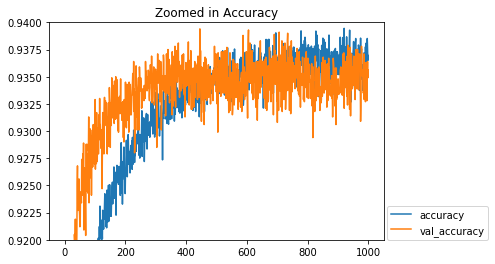

In [112]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc=(1.01, 0))
plt.hlines(1, -1, epochs+1, linestyle="solid", alpha=0.1)

# Restrict the ylimits on a very small range
plt.ylim(0.92, 0.94)

plt.title("Zoomed in Accuracy")
plt.show()

#### Getting a sense of the overfitting
By dividing the training accuracy with the validation accuracy, I get a sense of the overfitting. A value of 1 means identical accuracy, while going above 1 means higher accuracy on training data, while below 1 means higher accuracy on testing data.
To get a ratio of 1 for every epoch would be ideal, as this would mean the training data perfectly represents the testing data.
During testing of different models, I saw many different results on this graph. The most common was a steady incline, because the model gradually improved at the training but not as much on the testing. I added more dropout layers to combat this, and ended up with a correlation that I was happy with.

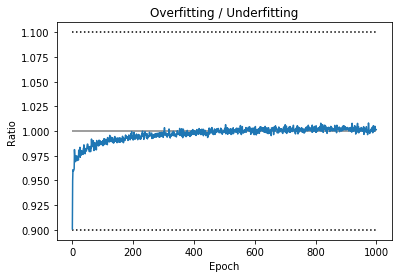

Final overfitting: 1.0014429726689509


In [113]:
# Create a list of the values
overfitting = [
    # Divide the training accuracy by the validation accuracy for the entire history, this will give the ratio
    acc / val_acc for acc, val_acc in zip(history.history['accuracy'], history.history['val_accuracy'])
]

# Plot the overfitting along with some horizontal lines
plt.plot(overfitting)
plt.hlines(1, -1, epochs, alpha=0.5)
plt.hlines(1.1, -1, epochs, linestyle="dotted")
plt.hlines(0.9, -1, epochs, linestyle="dotted")

# Decide the labels/title and show it
plt.xlabel("Epoch")
plt.ylabel("Ratio")
plt.title("Overfitting / Underfitting")
plt.show()

# Print the final result, this is the value of the model in its current state
print("Final overfitting:", overfitting[-1])

#### Loss
Even though the loss is not that interesting for a classification problem, this graph still tells us something. It tells me that the loss of the training keeps going down, while the loss of the validation is steadily increasing after only about 100 epochs. This is because of overfitting. The model is gradually memorizing the training data, instead of learning the characteristics. This causes the confidence of predictions on the testing data to decrease, hence the increase in error. I suspect that if I ran it for enough epochs, I would see a sudden steep decline in validation accuracy, as the model only knows the training data. Something similar to this: https://miro.medium.com/max/864/1*iANsamYbzkuUwIBWDP21GQ.gif (taken from https://towardsdatascience.com/preventing-deep-neural-network-from-overfitting-953458db800a)

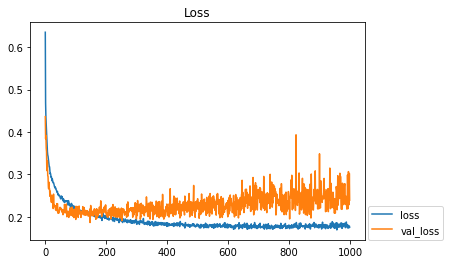

Loss: 0.23935686397403477


In [117]:
# Plot the loss from the history object
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend(loc=(1.01, 0))

# Set the title and show it
plt.title("Loss")
plt.show()

# Print the final loss gathered above
print("Loss:", final_loss)

### Comparing accuracy for the labels
Even though the accuracy is known, it is interesting to see how the model scores for each label. Here I isolate each label into lists, so that only one label gets tested at a time.

In [116]:
# Create a dictionary with a list for each label
testing_labels = {label: list() for label in labels}

# Iterate the testing data and store each index to the matching label
for index, image in df_test.iterrows():
    testing_labels[image.label].append(index)

# Print each label together with how many images with that label was found
label_instances = tabulate({
    "Label": labels.values(),
    "Instances": [len(label_list) for label_list in testing_labels.values()]
}, headers="keys")

print(label_instances)

Label          Instances
-----------  -----------
T-shirt/top         1000
Trouser             1000
Pullover            1000
Dress               1000
Coat                1000
Sandal              1000
Shirt               1000
Sneaker             1000
Bag                 1000
Ankle boot          1000


#### Testing each label

In [25]:
# This dictionary holds the float representing the accuracy for each label
accuracy = dict()

# Iterate each of the labels and count correct predictions
for label in testing_labels:
    
    # Increase by one if the prediction is a match
    matches = 0
    
    # Iterate the indices of the label
    for index in testing_labels[label]:
        
        # Collect the image from the test data and reshape it so that it can be used in the prediction
        image = test_X[index].reshape(1, 28, 28, 1)
        
        # Get the prediction
        predicted_label = model.predict_classes(image)
        
        # Increase matches if the model guessed correctly
        if predicted_label == label:
            matches += 1
    
    # Calcuate the accuracy by dividing the matches with the amount of indices for the label
    accuracy[label] = matches/len(testing_labels[label])

#### Plotting the results

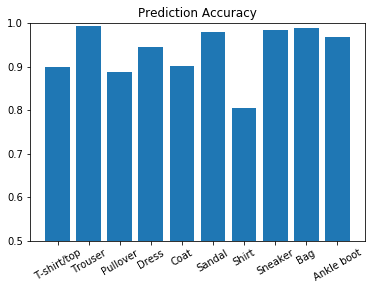

Clothing       Accuracy
-----------  ----------
T-shirt/top       0.9
Trouser           0.994
Pullover          0.888
Dress             0.945
Coat              0.902
Sandal            0.98
Shirt             0.805
Sneaker           0.985
Bag               0.988
Ankle boot        0.969


In [30]:
# Get the label text value to place on x axis
plot_labels = [labels[label] for label in accuracy]

# Create the bar plot with the accuracy
plt.bar(plot_labels, accuracy.values())

# Rotate the label text
plt.xticks(rotation=30)

# Change the range of the y axis and add the title
plt.ylim(0.5, 1)
plt.title("Prediction Accuracy")
plt.show()

# In addition to the plot, place a tabulated 
accuracy_p = tabulate({
    "Clothing": [labels[label] for label in testing_labels],
    "Accuracy": [accuracy[label] for label in accuracy]
}, headers = "keys")

print(accuracy_p)

#### Interpretation of individual labels
The bar chart shows the accuracy for each label. Some labels score better than others. The labels like 'Bag' score very high because it is a very distinct label, it does not look similar to the other labels. 'Bag' has distinct features that makes it hard to mistake for another label. 'Sandal', 'Sneaker' and 'Ankle Boot' also score high, these three do not look much like each other, but the similarity is sufficient to make the scoring a little lower than the very distinct 'Bag'.
The other labels are very similar, causing a drop in accuracy, especially for 'Shirt'. I suspect this is caused by shirts not being as distinguishable from the other clothing.

## Task 3
## *Reflective Report*


__Progress__<br>
Before I started this assignment, I had some basic understanding of how Convolutional Neural Networks operate, and what they are capable of. I learned more about the many different advanced strategies and techniques, and was surprised at how sophisticated some of them were. From the course I learned a few important concepts about developing Artificial Neural Networks, but this assignment gave me a more hands on experience on the technical aspects of developing, testing and analysing the performance of a model. Combined, I feel assured that I can use what I have learned in Machine Learning for more practical purposes, such as my Bachelor Thesis, future work and various projects I might encounter.
<br><br>
__Approach__<br>
My approach was to start simple with visualizing the data, and preparing it for usage in the CNN. When I was ready to develop my model, I was working with the simpler concepts of CNN before I moved on to more advanced implementations. Once I had a basic understanding of what the various techniques did, I started a trial and error process where I tried and tested many different implementations of layers, varying both size and the number of layers. After every model was run, I had plots that visualized the metrics. I was then able to slowly develop a model I was happy with. Once my models consistently achieved validation accuracy over 0.92, I realized I had to increase the number of epochs I ran it for in order to get better validation accuracy, the standard 20 epochs I had been using so far was no longer sufficient. I ran some for 50 or 100 epochs until I had a model I decided was going to be my final model, this one I ran for 1000 epochs and the graphs are visible in this report.
<br><br>
__Experience__<br>
I am able to better understand the purpose of using GPU station to run Neural Networks. For my 1000 epoch run, I ran it overnight on CPU and I think it took about 14 hours, and that was just for a small 28x28 grayscale image. Identifying multiple objects in RGB images that are in HD would probably take my model months.